In [8]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import xgboost
from xgboost import XGBClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [9]:
# Load dataset as dataframe
df = pd.read_csv('loan_data.csv')
df.head()

# Select input and output features
X = df.drop(columns = ['credit.policy'])
y = df['credit.policy']

X_encoded = pd.get_dummies(X)
X_encoded.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


In [10]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf = XGBClassifier(random_state = 42)
start = time.time()
# Fitting model on training data
clf.fit(train_X, train_y)
stop = time.time()  
print(f"Training time: {stop - start}s")

Training time: 0.07771897315979004s


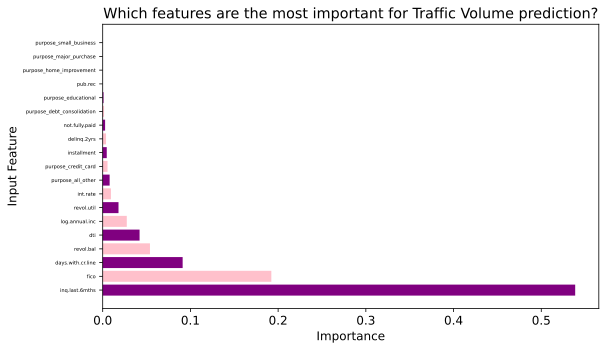

In [11]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for Traffic Volume prediction?') 
plt.tight_layout()
plt.yticks(fontsize=5)
plt.savefig("XGB_imp.svg");

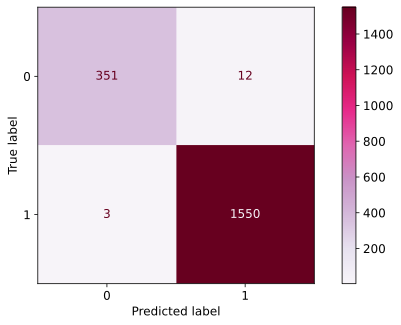

In [12]:
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);
plt.savefig("XGB_CM.svg")

In [13]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df.to_csv('XGB_CR.csv', index = True)
report_df.head()

,0,1,accuracy,macro avg,weighted avg
precision,0.991525,0.992318,0.992171,0.991921,0.992167
recall,0.966942,0.998068,0.992171,0.982505,0.992171
f1-score,0.979079,0.995185,0.992171,0.987132,0.992133
support,363.000000,1553.000000,0.992171,1916.000000,1916.000000


In [14]:
xgb_pickle = open('XGB.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, xgb_pickle) 

# Close the file
xgb_pickle.close() 